<a href="https://colab.research.google.com/github/Tanushree-233/Machine_Learning/blob/main/ML_5th_CrossValidatiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv


Dataset Shape: (705, 13)
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_S

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


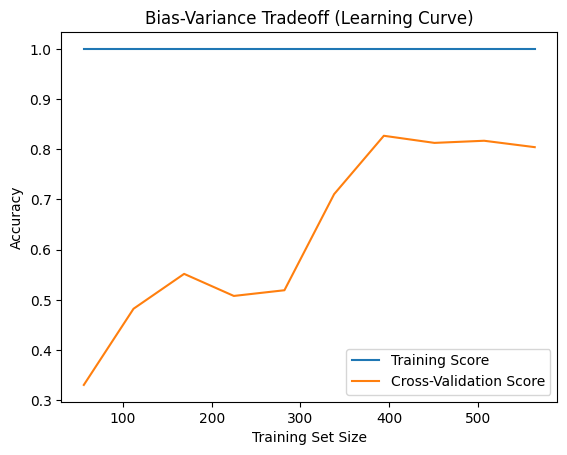

Fold scores: [0.9106383  0.93191489 0.97021277]
Average CV Accuracy: 0.9375886524822695


In [11]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load dataset
file_path = "/content/Students Social Media Addiction.csv" # Corrected file path
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Preprocessing
# Encode categorical features if any
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df.drop("Addicted_Score", axis=1)   # Assuming "Addicted_Score" is target column
y = df["Addicted_Score"]

# Check the distribution of the target variable
print("\nTarget Variable Distribution:\n", y.value_counts())

# Step 4: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model
model = DecisionTreeClassifier(random_state=42)

# Step 6: Bias-Variance using Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Bias-Variance Tradeoff (Learning Curve)")
plt.legend()
plt.show()

# Step 7: K-Fold Cross Validation
k = 3 # Reduced k to 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Fold scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

# Task
Perform k-fold cross-validation on the data in the file "kc_house_data.csv" to find the bias and variance of a linear regression model.